In [3]:
'''Checking Hamiltonian cycle in graph
using backtracking algorithm'''

class Graph(): 
    def __init__(self, vertices): 
        self.graph = [[0 for column in range(vertices)]
                            for row in range(vertices)] 
        self.V = vertices 
 
    ''' Check if this vertex is an adjacent vertex 
        of the previously added vertex and is not 
        included in the path earlier '''
    def isSafe(self, v, pos, path): 
        # Check if current vertex and last vertex 
        # in path are adjacent 
        if self.graph[ path[pos-1] ][v] == 0: 
            return False
 
        # Check if current vertex not already in path 
        for vertex in path: 
            if vertex == v: 
                return False
 
        return True
 
    # A recursive utility function to solve 
    # hamiltonian cycle problem 
    def hamCycleUtil(self, path, pos): 
 
        # base case: if all vertices are 
        # included in the path 
        if pos == self.V: 
            # Last vertex must be adjacent to the 
            # first vertex in path to make a cycle 
            if self.graph[ path[pos-1] ][ path[0] ] == 1: 
                return True
            else: 
                return False
 
        # Try different vertices as a next candidate 
        # in Hamiltonian Cycle. We don't try for 0 as 
        # we included 0 as starting point in hamCycle() 
        for v in range(1,self.V): 
 
            if self.isSafe(v, pos, path) == True: 
 
                path[pos] = v 
 
                if self.hamCycleUtil(path, pos+1) == True: 
                    return True
 
                # Remove current vertex if it doesn't 
                # lead to a solution 
                path[pos] = -1
 
        return False
 
    def hamCycle(self): 
        path = [-1] * self.V 
 
        ''' Let us put vertex 0 as the first vertex 
            in the path. If there is a Hamiltonian Cycle, 
            then the path can be started from any point 
            of the cycle as the graph is undirected '''
        path[0] = 0
 
        if self.hamCycleUtil(path,1) == False: 
            print ("Solution does not exist\n")
            return False
 
        self.printSolution(path) 
        return True
 
    def printSolution(self, path): 
        print ("Circle of Parity exists: Following",
                 "is one COP")
        for vertex in path: 
           print (vertex+1, end=" ")
        print(path[0]+1)
         

In [4]:
'''Simulating results of the tournament at random'''

import itertools
import random

def simulate_tournament(n):
    teams = list(range(1, n + 1))
    matches = list(itertools.combinations(teams, 2))

    results = []
    team_wins = {team: 0 for team in teams}
    team_losses = {team: 0 for team in teams}

    for match in matches:
        team1, team2 = match
        result = random.choice([team1, team2])  # Select the winner randomly

        # Ensure that the winner (team1 or team2) comes first in the tuple
        if result == team1:
            results.append((team1, team2))
            team_wins[team1] += 1
            team_losses[team2] += 1
        else:
            results.append((team2, team1))
            team_wins[team2] += 1
            team_losses[team1] += 1

    print("\nTournament Results:")
    print("{:<12} {:<12} {:<12}".format("Team 1", "Team 2", "Winner"))
    print("-"*36)
    for match in results:
        print("{:<12} {:<12} {:<12}".format(f"Team {match[0]}", f"Team {match[1]}", f"Team {match[0]}"))
    print("\nFinal Tally:")
    print("{:<12} {:<12} {:<12}".format("Team", "Matches Won", "Matches Lost"))
    print("-"*36)
    for team in teams:
        print("{:<12} {:<12} {:<12}".format(f"Team {team}", team_wins[team], team_losses[team]))

    return results


In [5]:
'''Make an adjacency matrix of the results'''

def make_graph(tournament_results):
    teams = sorted(set(team for match in tournament_results for team in match))
    team_indices = {team: index for index, team in enumerate(teams)}

    # Initialize the adjacency matrix with zeros
    num_teams = len(teams)
    adjacency_matrix = [[0] * num_teams for _ in range(num_teams)]

    # Update the adjacency matrix based on tournament results
    for winner, loser in tournament_results:
        winner_index = team_indices[winner]
        loser_index = team_indices[loser]
        adjacency_matrix[winner_index][loser_index] = 1

    return adjacency_matrix

In [6]:
'Reset values'

n_values = []
prob_n = []

has_COP = 0

In [10]:
'Run the algorithm'
'count_max is the number of iterations for each n'

for n in range(5,16):
    count_max = 500
    for _ in range(count_max):
        tournament_results = simulate_tournament(n)
        G = Graph(n)
        G.graph = make_graph(tournament_results)

        if G.hamCycle() == True:
            has_COP += 1

    prob = has_COP/count_max
    if not n in n_values:
        n_values.append(n)
        prob_n.append(prob)

    has_COP = 0



Tournament Results:
Team 1       Team 2       Winner      
------------------------------------
Team 1       Team 2       Team 1      
Team 1       Team 3       Team 1      
Team 2       Team 3       Team 2      

Final Tally:
Team         Matches Won  Matches Lost
------------------------------------
Team 1       2            0           
Team 2       1            1           
Team 3       0            2           
Solution does not exist


Tournament Results:
Team 1       Team 2       Winner      
------------------------------------
Team 2       Team 1       Team 2      
Team 3       Team 1       Team 3      
Team 2       Team 3       Team 2      

Final Tally:
Team         Matches Won  Matches Lost
------------------------------------
Team 1       0            2           
Team 2       2            0           
Team 3       1            1           
Solution does not exist


Tournament Results:
Team 1       Team 2       Winner      
------------------------------------
Team 2     

In [11]:
print(n_values, prob_n)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 3] [0.53, 0.696, 0.818, 0.884, 0.952, 0.964, 0.99, 0.984, 0.99, 0.996, 0.998, 0.27]


Text(0.5, 1.0, 'Probability that COP is possible among n teams')

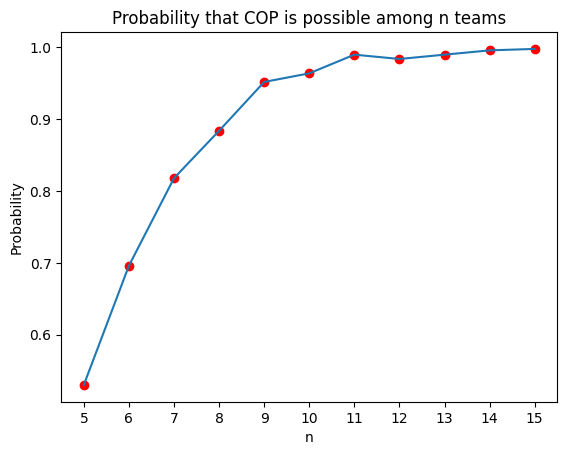

In [9]:
import matplotlib.pyplot as plt 
plt.plot(n_values, prob_n)
plt.xticks(n_values)
plt.scatter(n_values, prob_n, color='red', marker='o')
plt.xlabel('n')
plt.ylabel('Probability')
plt.title('Probability that COP is possible among n teams')

In [12]:
'Case where ABC form loop and DEF form loop'

g1 = Graph(6)
g1.graph = [
    [0,1,0,0,0,0],
    [0,0,1,0,0,0],
    [1,0,0,0,0,0],
    [1,1,1,0,1,0],
    [1,1,1,0,0,1],
    [1,1,1,1,0,0]
]
g1.hamCycle()

Solution does not exist



False